Ticket, CodProducto, Subfamilia, CodTienda, Fecha,ImporteVenta, Cantidad

VentasCAB, VentasDET, Productos

consulta = 'SELECT C.Ticket, P.CodProducto, Subfamilia, CodTienda, Fecha, ImporteVenta, Cantidad FROM VentasDET D INNER JOIN VentasCAB C ON D.Ticket = C.Ticket INNER JOIN Productos P ON P.CodProducto = D.CodProducto'

In [3]:
# Importo las Librerias
import pandas as pd
import sqlite3

In [4]:
# Defino la Cadena de Conexión y la Consulta SQL
conexion = sqlite3.connect('/content/drive/MyDrive/Datos/Tiendas24H.sqlite')
consulta = 'SELECT C.Ticket, P.CodProducto, Subfamilia, CodTienda, Fecha, ImporteVenta, Cantidad FROM VentasDET D INNER JOIN VentasCAB C ON D.Ticket = C.Ticket INNER JOIN Productos P ON P.CodProducto = D.CodProducto'

In [5]:
# Ejecuto la consulta y reviso la información cargada en el Dataframe
ventas = pd.read_sql_query(consulta , conexion)
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615263 entries, 0 to 615262
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Ticket        615263 non-null  object 
 1   CodProducto   615263 non-null  object 
 2   Subfamilia    615263 non-null  object 
 3   CodTienda     615263 non-null  object 
 4   Fecha         615263 non-null  object 
 5   ImporteVenta  615263 non-null  float64
 6   Cantidad      615263 non-null  float64
dtypes: float64(2), object(5)
memory usage: 32.9+ MB


In [ ]:
# Convertimos la fecha a formato fecha y el resto a string
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'], format='%Y/%m/%d')
ventas['Ticket'] = ventas['Ticket'].astype('string')
ventas['CodProducto'] = ventas['CodProducto'].astype('string')

In [ ]:
# Vemos que tenemos mínimos negativos
ventas.describe()

In [11]:
# Elimino las ventas con Cantidad Menor o igual a 0
ventas = ventas[ventas['Cantidad'] > 0]
ventas.describe()

,ImporteVenta,Cantidad
count,611373.000000,611373.000000
mean,1.783490,1.108574
std,2.498879,0.733884
min,0.000000,0.240000
25%,0.867000,1.000000
50%,1.198500,1.000000
75%,1.810500,1.000000
max,364.395000,350.000000


In [ ]:
ventas['ImporteTotal'] = ventas['Cantidad'] * ventas['ImporteVenta']
ventas.head()

In [ ]:
ventas.insert(loc = 2 ,column = "Mes" , value = ventas['Fecha'].dt.month)


In [ ]:
ventas.insert(loc = 3 , column = ' DiaSemana' , value = ventas['Fecha'].dt.dayofweek)
ventas.head()

In [ ]:
ventas.info()

In [26]:
# Número de Tickets por Subfamilia y DiaSemana

resumenVentas = ventas.groupby(by = ['Subfamilia' , ' DiaSemana'] , as_index=False)['Ticket'].count()

In [ ]:
resumenVentas

In [ ]:
# Filas con ImporteVenta = 0
descuentos = ventas[ventas['ImporteVenta'] == 0]
descuentos.head()

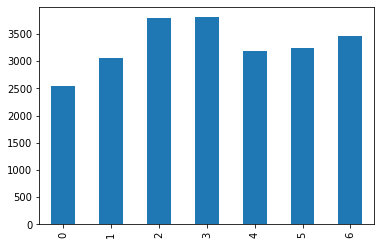

In [33]:
descuentos[' DiaSemana'].value_counts().sort_index().plot(kind='bar')

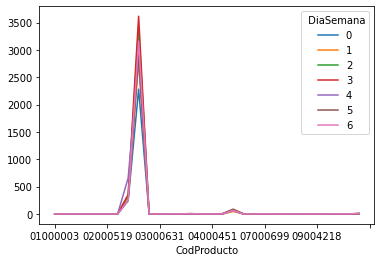

In [38]:
descuentos.pivot_table ('Cantidad' , index = 'CodProducto' , columns =' DiaSemana' , aggfunc = 'sum' , fill_value = 0).plot()

In [ ]:
!pip install sweetviz

In [1]:
import sweetviz as sv

In [6]:
informe = sv.analyze(ventas)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
informe.show_notebook()

In [8]:
informe.show_html("ventas.html")

Report ventas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
